# 0. Import 

In [1]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, transpile
from qiskit import Aer, execute
from qiskit.extensions import Initialize
from qiskit.tools.visualization import plot_histogram, plot_bloch_multivector, array_to_latex
from qiskit.quantum_info import partial_trace, Statevector, random_statevector
import numpy as np
import math

In [130]:
def create_bell_state(circuit, q1, q2):
    circuit.h(q1)
    circuit.cnot(q1, q2)

def create_bell_state(circuit, register):
    circuit.h(register[0])
    circuit.cnot(register[0], register[1])

def teleport_gates(circuit, alice_qbit, alice_ent):
    circuit.cnot(alice_qbit, alice_ent)
    circuit.h(alice_qbit)


def swap(circuit, q1, q2):
    circuit.cnot(q1, q2)
    circuit.cnot(q2,q1)
    circuit.cnot(q1, q2)

# 1. Entaglement Circuit

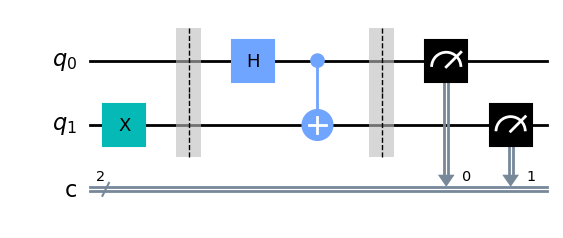

In [84]:
# Entaglement circuit

INITIAL_VALUES = [0, 1]

qreg = QuantumRegister(2, 'q')
creg = ClassicalRegister(2, 'c')
qc = QuantumCircuit(qreg, creg)

for id, element in enumerate(INITIAL_VALUES):
    if element:
        qc.x(id)

qc.barrier()

qc.h(0)

qc.cx(0,1)

qc.barrier()

qc.measure(qreg, creg)
qc.draw(output='mpl')

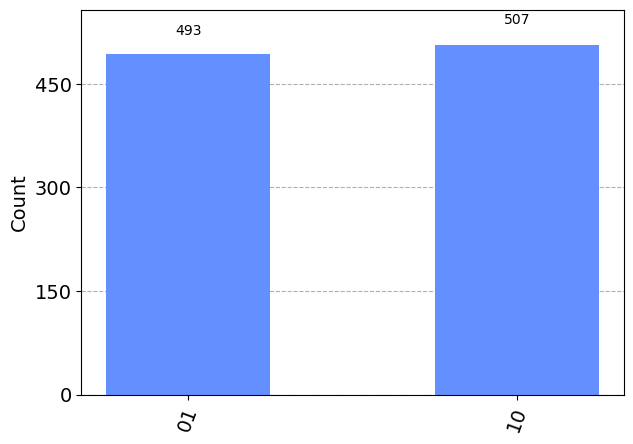

In [85]:
# Esecuzione completa

backend = Aer.get_backend("qasm_simulator")
job = execute(qc, backend,shots=1000)
result = job.result()
plot_histogram(result.get_counts())

# 2. Teleportation

<IPython.core.display.Latex object>

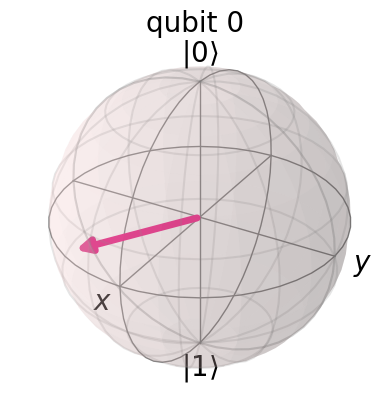

In [98]:
psi = random_statevector(2)
display(array_to_latex(psi, prefix="|\\psi\\rangle ="))
display(plot_bloch_multivector(psi))
init_gate = Initialize(psi)

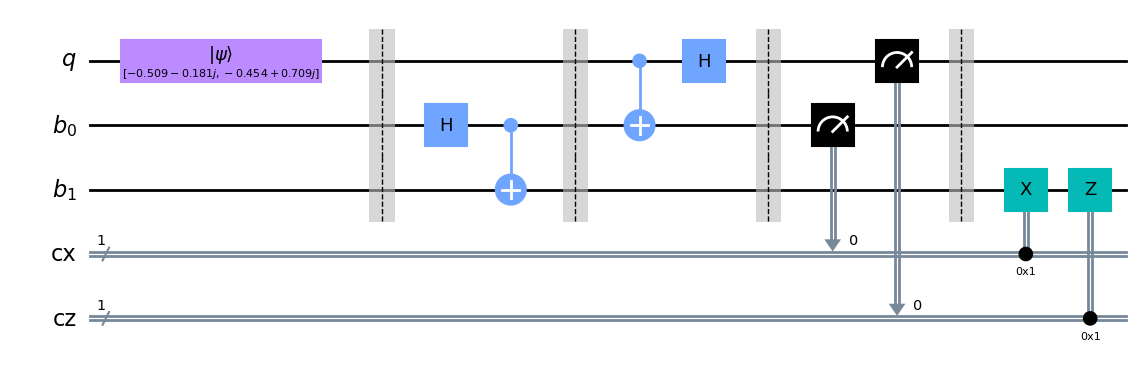

In [102]:
def teleport_gates(circuit, alice_qbit, alice_ent):
    circuit.cnot(alice_qbit, alice_ent)
    circuit.h(alice_qbit)


qbit = QuantumRegister(1, 'q')
enreg = QuantumRegister(2, 'b')
cz = ClassicalRegister(1,  'cz')
cx = ClassicalRegister(1,  'cx')

qc = QuantumCircuit(qbit, enreg, cx, cz, name="Teleportation")


#Inizializzo il qbit da inviare
qc.append(init_gate, [0])
qc.barrier()

# Entaglement qbit condivisi
create_bell_state(qc, enreg)
qc.barrier()

# Teletrasporto
teleport_gates(qc, qbit, enreg[0])
qc.barrier()

#Misurazione primi due
qc.measure(enreg[0], cx)
qc.measure(qbit, cz)
qc.barrier()

#Trasformazione da classical register
qc.x(enreg[1]).c_if(cx, 1)
qc.z(enreg[1]).c_if(cz, 1)



qc.draw(output='mpl')

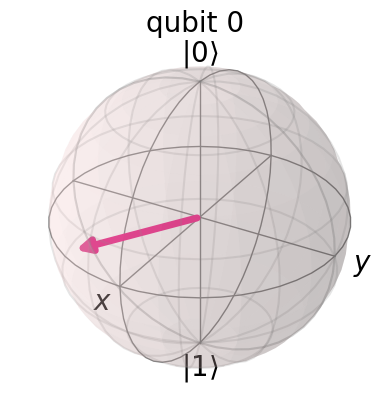

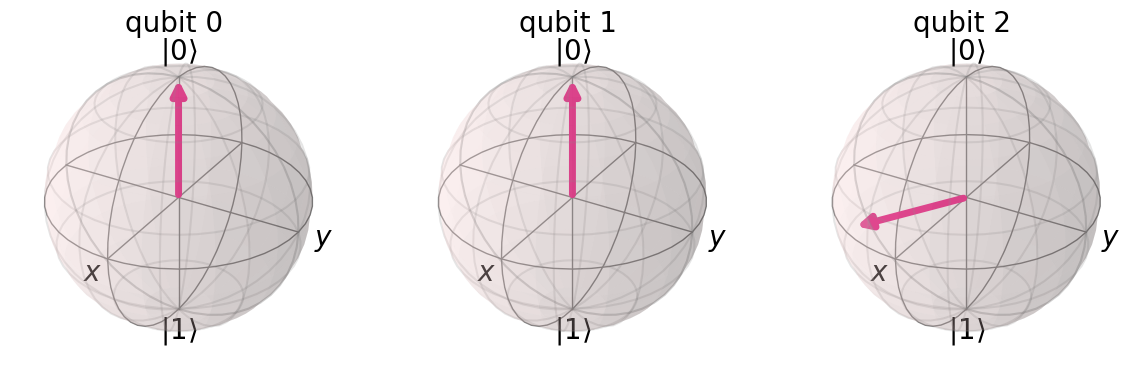

In [100]:
# Esecuzione completa

backend = Aer.get_backend("aer_simulator")
qc.save_statevector()
out_vector = backend.run(qc).result().get_statevector()
display(plot_bloch_multivector(psi))
display(plot_bloch_multivector(out_vector))

# 3. Toffoli e Swap

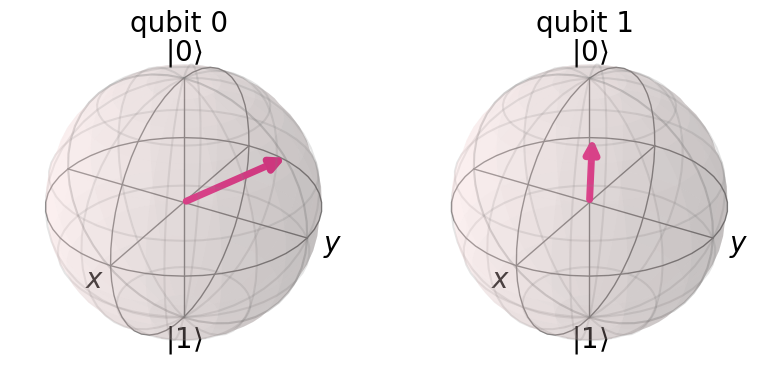

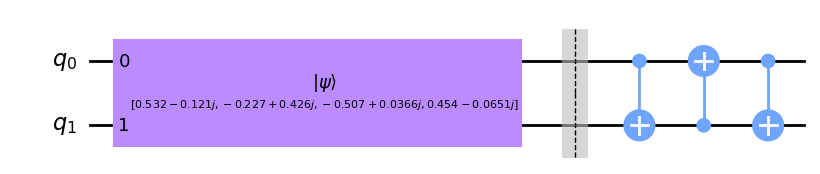

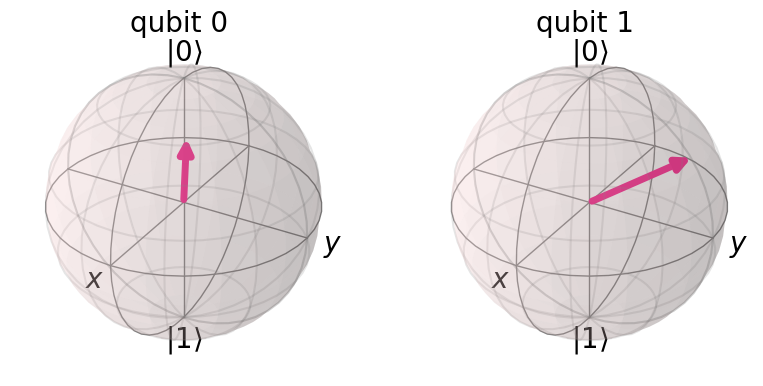

In [126]:
def swap(circuit, q1, q2):
    circuit.cnot(q1, q2)
    circuit.cnot(q2,q1)
    circuit.cnot(q1, q2)


q = random_statevector(dims=(2,2))
display(plot_bloch_multivector(q))


init_gate = Initialize(q)

qreg = QuantumRegister(2, 'q')
qc = QuantumCircuit(qreg)


qc.append(init_gate, [0,1])
qc.barrier()

swap(qc, qreg[0], qreg[1])

display(qc.draw(output='mpl'))


backend = Aer.get_backend("aer_simulator")
qc.save_statevector()
out_vector = backend.run(qc).result().get_statevector()
display(plot_bloch_multivector(out_vector))
